### **The aim of this project is to analyze different type of Netflix users according to various factors outlined in the Dataset.**

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets/Netflix Userbase.csv')

In [3]:
#displaying top 10 values of dataset
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [4]:
df.shape

(2500, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
#checking for null values in dataset
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
#unique countries
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [8]:
#Calculating Country wise total monthly revenue
country_revenue=df.groupby('Country')['Monthly Revenue'].sum()
country_revenue

Country
Australia         2271
Brazil            2285
Canada            3950
France            2307
Germany           2260
Italy             2317
Mexico            2237
Spain             5662
United Kingdom    2318
United States     5664
Name: Monthly Revenue, dtype: int64

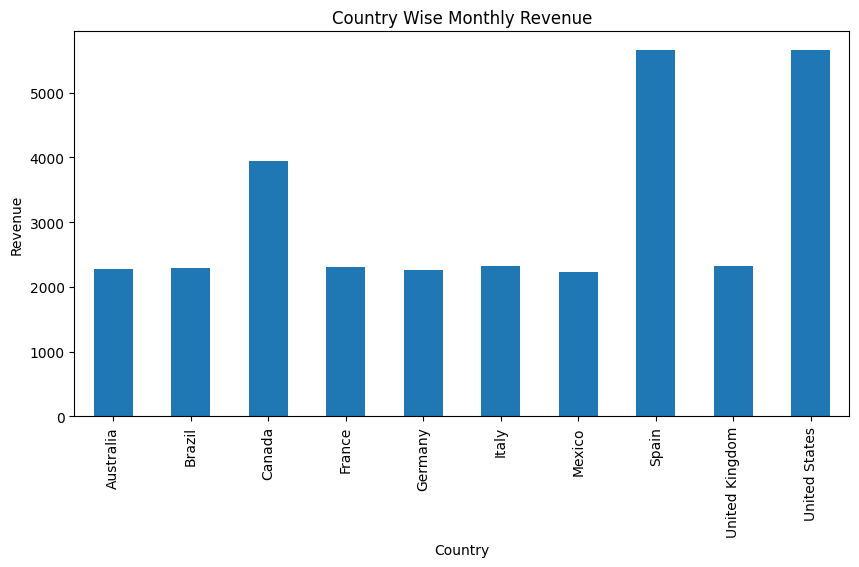

In [9]:
plt.figure(figsize=(10,5))
plt.title('Country Wise Monthly Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
country_revenue.plot(kind='bar')
plt.show()

<Axes: xlabel='Device', ylabel='count'>

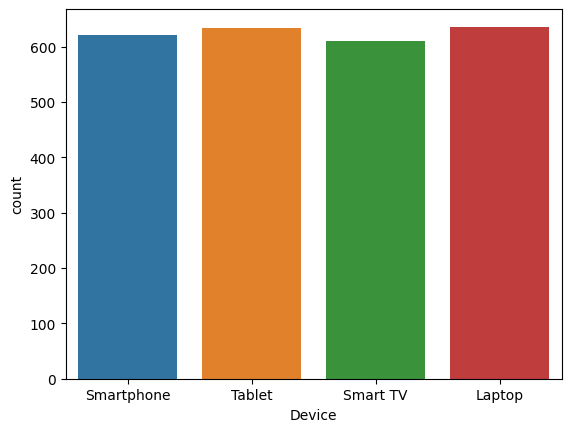

In [10]:
sns.countplot(data=df, x='Device')

<Axes: xlabel='Subscription Type', ylabel='count'>

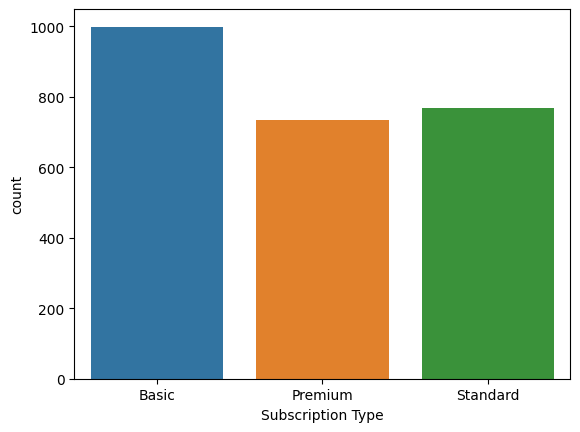

In [11]:
sns.countplot(data=df, x='Subscription Type')

<Axes: xlabel='Gender', ylabel='count'>

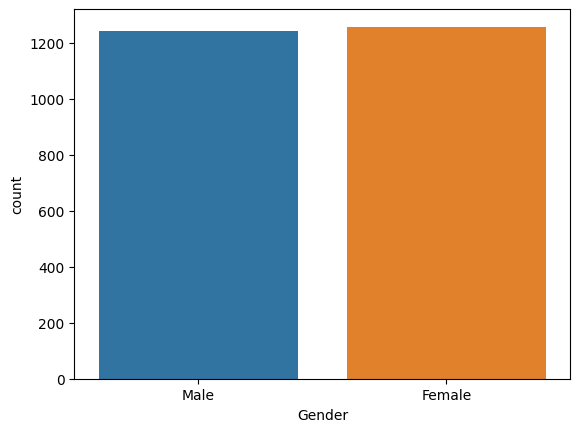

In [12]:
sns.countplot(data=df, x='Gender')

<Axes: ylabel='Frequency'>

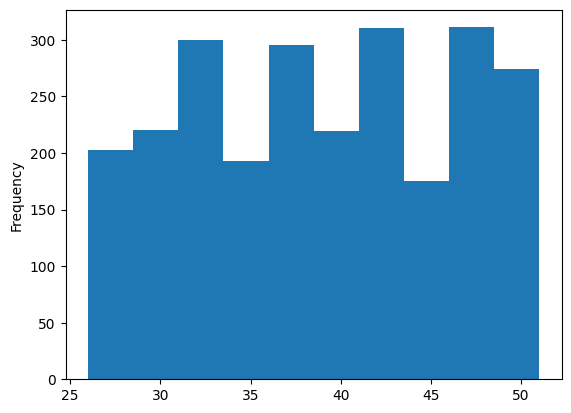

In [13]:
df['Age'].plot(kind='hist')


In [14]:
#Calculating the average monthly revenue
average_revenue= country_revenue.mean()
average_revenue

3127.1

In [15]:
#Countries with Lower Monthly Revenue
low_revenue = country_revenue[country_revenue<average_revenue]
low_revenue

Country
Australia         2271
Brazil            2285
France            2307
Germany           2260
Italy             2317
Mexico            2237
United Kingdom    2318
Name: Monthly Revenue, dtype: int64

<Axes: ylabel='Country'>

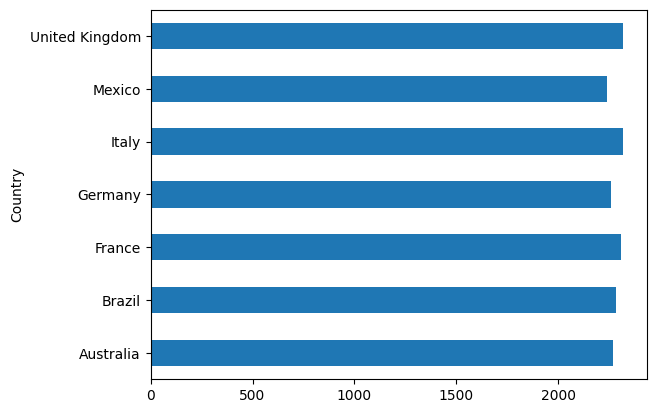

In [16]:
low_revenue.plot(kind='barh')

In [17]:
#Countries with higher monthly Revenue
high_revenue=country_revenue[country_revenue>average_revenue]
high_revenue

Country
Canada           3950
Spain            5662
United States    5664
Name: Monthly Revenue, dtype: int64

<Axes: ylabel='Country'>

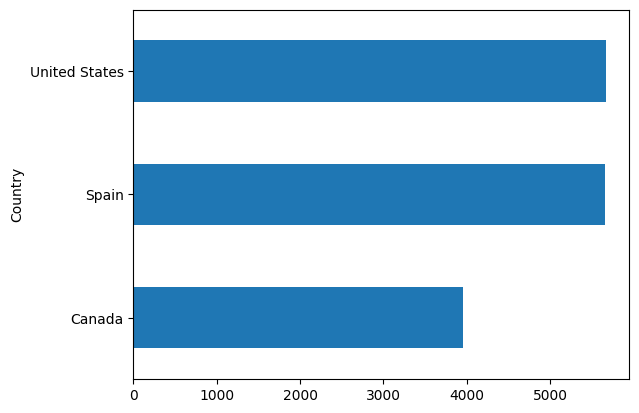

In [18]:
high_revenue.plot(kind='barh')

In [19]:
#Different plans according to different countries
country_plans=df.groupby('Country')['Subscription Type'].value_counts()
country_plans

Country         Subscription Type
Australia       Premium              101
                Standard              51
                Basic                 31
Brazil          Basic                146
                Premium               33
                Standard               4
Canada          Basic                145
                Premium               88
                Standard              84
France          Premium              147
                Basic                 36
Germany         Basic                149
                Standard              31
                Premium                3
Italy           Basic                176
                Premium                4
                Standard               3
Mexico          Standard             179
                Basic                  4
Spain           Premium              212
                Standard             129
                Basic                110
United Kingdom  Standard             180
                Basic  

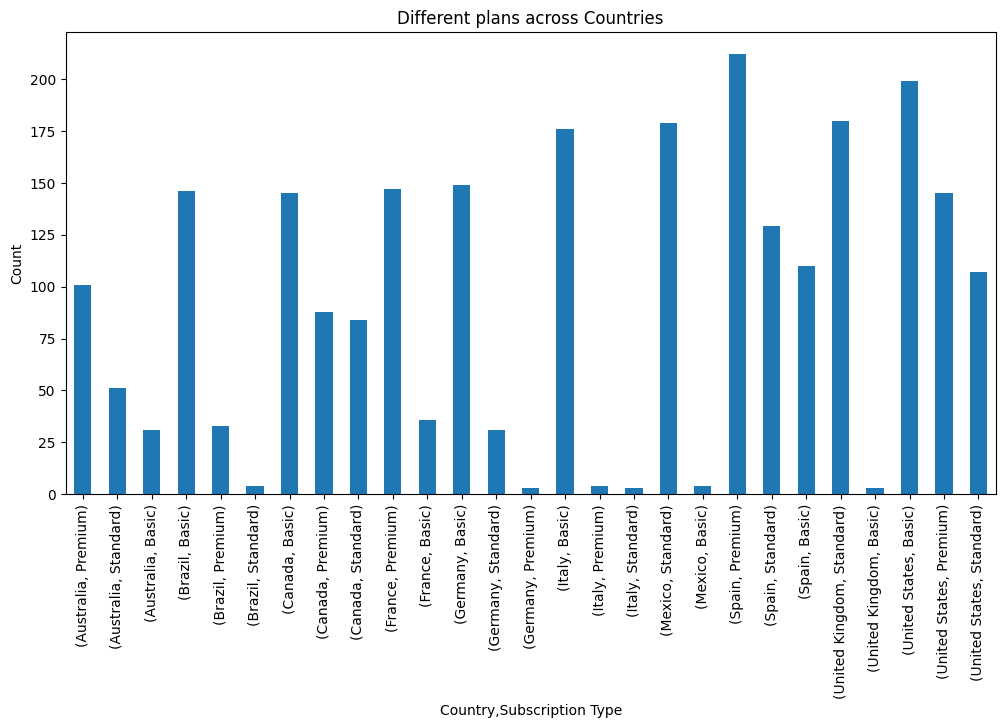

In [20]:
plt.figure(figsize=(12,6))
plt.title('Different plans across Countries')
plt.xlabel('Country and plan')
plt.ylabel('Count')
country_plans.plot(kind='bar')
plt.show()

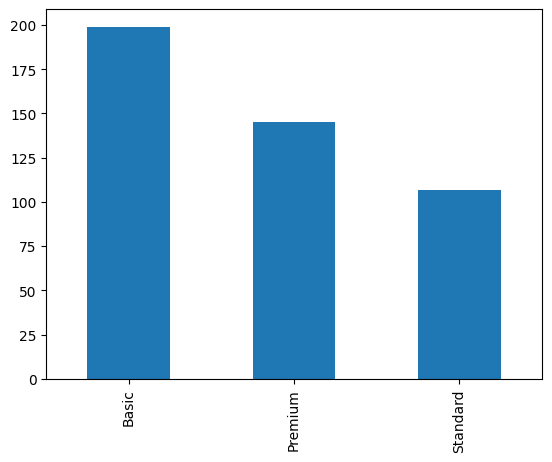

In [21]:
#Various Subscription plans across United States
united_states=df[df['Country']=='United States']
plans=united_states['Subscription Type'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'County vs Premium Subscription')

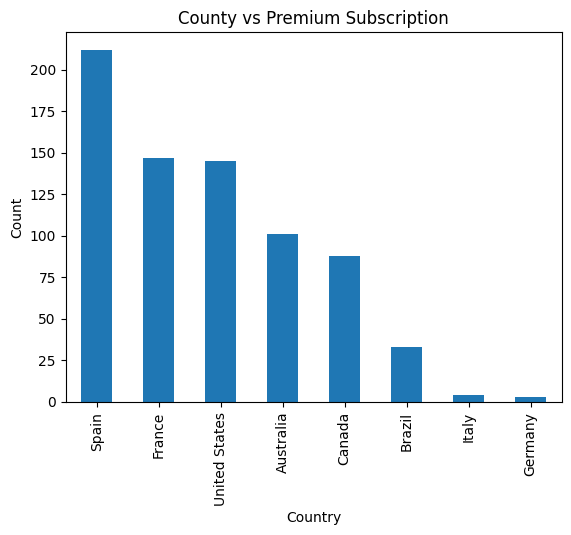

In [22]:
#Countries with number of premium subscription
premium_sub=df[df['Subscription Type']=='Premium']
premium_country=premium_sub['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('County vs Premium Subscription')


In [23]:
#Different plans according to different countries
country_device=df.groupby('Country')['Device'].value_counts()
country_device

Country         Device    
Australia       Smartphone     55
                Laptop         47
                Tablet         43
                Smart TV       38
Brazil          Smartphone     55
                Laptop         44
                Tablet         44
                Smart TV       40
Canada          Tablet         95
                Smartphone     80
                Smart TV       78
                Laptop         64
France          Laptop         52
                Smartphone     47
                Smart TV       43
                Tablet         41
Germany         Laptop         63
                Smart TV       42
                Tablet         42
                Smartphone     36
Italy           Laptop         50
                Smartphone     47
                Smart TV       46
                Tablet         40
Mexico          Tablet         52
                Smartphone     46
                Laptop         44
                Smart TV       41
Spain           Smart

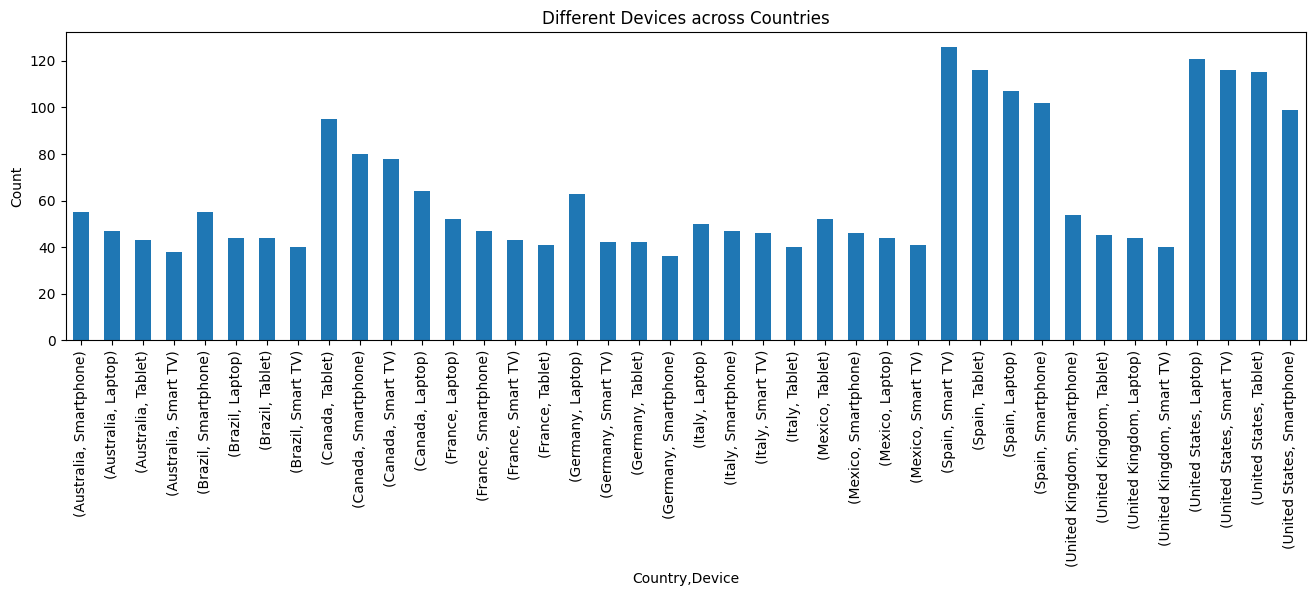

In [24]:
plt.figure(figsize=(16,4))
plt.title('Different Devices across Countries')
plt.xlabel('Country and Device')
plt.ylabel('Count')
country_device.plot(kind='bar')
plt.show()

In [25]:
#monthly revenue according to plan type
revenue_plan=df.groupby('Subscription Type')['Monthly Revenue'].sum()
revenue_plan

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64

<Axes: title={'center': 'Plan vs monthly Revenue'}, xlabel='Subscription Type', ylabel='Monthly Revenue'>

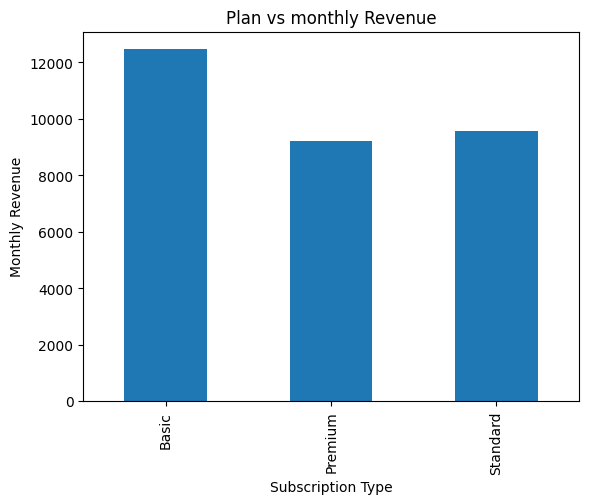

In [26]:
plt.title('Plan vs monthly Revenue')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
revenue_plan.plot(kind='bar')